# Package installation

In [55]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import folium
import matplotlib as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from folium.plugins import HeatMap
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator 
from PIL import Image
from operator import itemgetter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import *
from bokeh.models import ColumnDataSource, HoverTool
import nltk
nltk.download('wordnet')
import stylecloud
import re
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/helenehjort/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

https://www.kaggle.com/datasets/justinas/startup-investments?select=funds.csv

**acquisitions.csv:** information about startups that have been bought (price and time)

**degrees.csv:** the education backgrounds of individuals involved in the startup world.

**funding_rounds.csv:** information about startup funding rounds (amounts of founds, dates, founding, the founder)

**funds.csv:** data on the venture capital funds that make investments.

**investments.csv:** data on the various different investments made by venture capitalists.

**ipos.csv:** data on initial public offerings (stock name)

**milestones.csv:** events within the startup ecosystem. (Milestone description)

**objects.csv:** Main file containing base information. (Name, category, status)

**offices.csv:** information about startup company offices (latitude and longitude)

**people.csv:** information about individuals in the startup world.

**relationships.csv:** relationship data that links companies to individuals and their positions.

In [2]:
acquisitions = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/acquisitions.csv")
degrees = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/degrees.csv")
funding_rounds = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/funding_rounds.csv")
founds = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/funds.csv")
investments = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/investments.csv")
ipos = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/ipos.csv")
milestones = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/milestones.csv")
objects = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/objects.csv")
offices = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/offices.csv")
people = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/people.csv")
relationships = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/relationships.csv")

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_1544/2871047034.py:8: DtypeWarning:

Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
"""
acquisitions = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/acquisitions.csv")
degrees = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/degrees.csv")
funding_rounds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funding_rounds.csv")
founds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funds.csv")
investments = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/investments.csv")
ipos = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/ipos.csv")
milestones = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/milestones.csv")
objects = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/objects.csv")
offices = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/offices.csv")
people = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/people.csv")
relationships = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/relationships.csv")
"""


'\nacquisitions = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/acquisitions.csv")\ndegrees = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/degrees.csv")\nfunding_rounds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funding_rounds.csv")\nfounds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funds.csv")\ninvestments = pd.read_csv("/Users/kathri

In [4]:
"""
acquisitions = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/acquisitions.csv")
degrees = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/degrees.csv")
funding_rounds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funding_rounds.csv")
founds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funds.csv")
investments = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/investments.csv")
ipos = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/ipos.csv")
milestones = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/milestones.csv")
objects = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/objects.csv")
offices = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/offices.csv")
people = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/people.csv")
relationships = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/relationships.csv")
"""

'\nacquisitions = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/acquisitions.csv")\ndegrees = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/degrees.csv")\nfunding_rounds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funding_rounds.csv")\nfounds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funds.csv")\ninvestments = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/investments.csv")\nipos = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/ipos.csv")\nmilestones = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/milestones.csv")\nobjects = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/objects.csv")\noffices = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/offices.csv")\npeople = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/people.csv")\nrelationsh

# Data cleaning

## Offices

In [5]:
offices

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112713,112714,f:15098,127846,NaN,New York,8 Sound Shore Drive,Suite 303,Greenwich,06830,CT,USA,0.000000,0.000000,NaN,NaN
112714,112715,c:286200,127847,NaN,Santa Barbara,735 State Street,Suite 500,Santa Barbara,93101,CA,USA,0.000000,0.000000,NaN,NaN
112715,112716,c:256895,127848,NaN,Los Angeles,"5777 W. Century Blvd., Suite 360",NaN,Los Angeles,90045,CA,USA,0.000000,0.000000,NaN,NaN
112716,112717,c:256200,127849,NaN,New York,420 LExington Avenue,NaN,New York,10170,NY,USA,0.000000,0.000000,NaN,NaN


In [6]:
# distribution of countries
county_counts = offices['country_code'].value_counts()
df_county_counts = pd.DataFrame({'country_code': county_counts.index, 'count': county_counts.values})
df_county_counts =df_county_counts[0:10]


# plot
fig = px.bar(df_county_counts, x='country_code', y='count')

# layout
fig.update_layout(
    title='Top 10 Countries with Most Startups companies',
    xaxis_title='Country',
    yaxis_title='Number of startups',
   
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)
fig.show()

In [7]:
state_counts = offices['country_code'].value_counts().reset_index()
state_counts.columns = ['country_code', 'count']
fig = px.choropleth(state_counts, locations='country_code', color='count',
                    locationmode='ISO-3',
                    color_continuous_scale='Deep',
                    range_color=(0, state_counts['count'].max()),
                    labels={'count': 'Number of start ups companies'})

fig.update_layout(title_text='Number of start ups by contry')

fig.update_geos(
    visible=False,
    projection=dict(type='equirectangular')
)

fig.show()

In [8]:
# Only keep data from usa
usa_offices=offices.loc[offices['country_code'] == 'USA']
# removed columns: description, address1, address2, zip_code, country_code, created_at, updated_at
# collumn
usa_offices = usa_offices.loc[:, ['id', 'object_id','office_id','region', 'city', 'state_code', 'latitude', 'longitude']]
usa_offices

,id,object_id,office_id,region,city,state_code,latitude,longitude
0,1,c:1,1,Seattle,Seattle,WA,47.603122,-122.333253
1,2,c:3,3,SF Bay,Pleasanton,CA,37.692934,-121.904945
2,3,c:4,4,SF Bay,San Francisco,CA,37.764726,-122.394523
3,4,c:5,5,SF Bay,Menlo Park,CA,37.416050,-122.151801
5,6,c:8,8,SF Bay,San Carlos,CA,37.506885,-122.247573
...,...,...,...,...,...,...,...,...
112713,112714,f:15098,127846,New York,Greenwich,CT,0.000000,0.000000
112714,112715,c:286200,127847,Santa Barbara,Santa Barbara,CA,0.000000,0.000000
112715,112716,c:256895,127848,Los Angeles,Los Angeles,CA,0.000000,0.000000
112716,112717,c:256200,127849,New York,New York,NY,0.000000,0.000000


In [9]:
city_counts = usa_offices['city'].value_counts()
df_city_counts = pd.DataFrame({'city': city_counts.index, 'count': city_counts.values})
df_city_counts =df_city_counts[0:9]


fig = px.bar(df_city_counts, x='city', y='count')
fig.update_layout(
    title='Top 10 cities in USA with Most Startups companies',
    xaxis_title='Cities',
    yaxis_title='Number of startups',
  
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

# display the chart
fig.show()
#pyo.plot(fig, filename='cities.html')

'cities.html'

In [10]:
state_counts = usa_offices['state_code'].value_counts().reset_index()
state_counts.columns = ['state_code', 'count']
fig = px.choropleth(state_counts, locations='state_code', color='count',
                    locationmode='USA-states', scope='usa',
                    color_continuous_scale='Deep',
                    range_color=(0, state_counts['count'].max()),
                    labels={'count': 'Number of startups'})
fig.update_layout(title_text='Number of fires by State')
fig.show()

## Data about the founder

**people** and **degrees** contain data about the founder of the company, we use **relationship** to be able to merge the person with the company.

In [11]:
founders = pd.merge(relationships, people, left_on='person_object_id', right_on='object_id', how='left')
founders = pd.merge(founders, degrees, left_on='person_object_id', right_on='object_id', how='left')


In [12]:
#we want to investigate whether educational background has an influence on start-up success, therefore all empty rows are removed.
founders.dropna(subset=['degree_type'], inplace=True)


In [13]:
# removed columns from relationships: 'id_x', 'relationship_id', 'start_at', 'end_at', 'is_past', 'sequence', 'created_at_x' 'updated_at_x',

# removed columns from people: 'id_y', 'object_id_x',

# removed columns from degrees: 'id', 'object_id_y', , 'created_at_y', 'updated_at_y'

# collumn
founders = founders.loc[:, [ 'person_object_id', 'relationship_object_id', 'title',  'first_name', 'last_name',
       'birthplace', 'affiliation_name',  'degree_type',
       'subject', 'institution', 'graduated_at']]

In [14]:
# Only keep data from USA
founders = founders[founders['relationship_object_id'].isin(usa_offices['object_id'])]

In [15]:
# Extract year the employees graduated in
founders['graduated_at'] = pd.to_datetime(founders['graduated_at'], format = '%Y-%m-%d')
founders['grad_year'] = founders['graduated_at'].dt.year

In [16]:
founders

,person_object_id,relationship_object_id,title,first_name,last_name,birthplace,affiliation_name,degree_type,subject,institution,graduated_at,grad_year
0,p:2,c:1,Co-Founder/CEO/Board of Directors,Ben,Elowitz,NaN,Blue Nile,BS,Electrical Engineering/Computer Science,"University of California, Berkeley",1994-01-01,1994.0
1,p:2,c:1,Co-Founder/CEO/Board of Directors,Ben,Elowitz,NaN,Blue Nile,BS,Applied Mathematics,"University of California, Berkeley",1994-01-01,1994.0
2,p:3,c:1,VP Marketing,Kevin,Flaherty,NaN,Wetpaint,BBA,NaN,Washington University in St Louis,NaT,NaN
3,p:3,c:1,VP Marketing,Kevin,Flaherty,NaN,Wetpaint,MBA,NaN,Indiana University,NaT,NaN
5,p:5,c:3,Senior Director Strategic Alliances,Ian,Wenig,NaN,Zoho,Degree,Advanced Business Professional Course,The Aji Network,2005-01-01,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...
565273,p:268589,c:12612,"Controller, Wolters Kluwer Health",John,Pins,NaN,Unaffiliated,CPA,NaN,American Institute of Certtified Public Accoun...,NaT,NaN
565274,p:268589,c:12612,"Director, Accounting - Professional & Educatio...",John,Pins,NaN,Unaffiliated,B.S.,Accounting,Iowa State University,NaT,NaN
565275,p:268589,c:12612,"Director, Accounting - Professional & Educatio...",John,Pins,NaN,Unaffiliated,CPA,NaN,American Institute of Certtified Public Accoun...,NaT,NaN
565276,p:268527,c:39172,"Director, Business Development",Harry,Wei,NaN,Unaffiliated,MS & BS,Engineering,South China University of Technology,NaT,NaN


In [17]:
founders['title'].unique()

array(['Co-Founder/CEO/Board of Directors', 'VP Marketing',
       'Senior Director Strategic Alliances', ...,
       'Accounting Manager for Facts & Comparisons',
       'Controller, Wolters Kluwer Health',
       'Director, Accounting - Professional & Education Business Unit'],
      dtype=object)

In [18]:
degree_counts = founders['degree_type'].value_counts()
df_degree_counts = pd.DataFrame({'degree_type': degree_counts.index, 'count': degree_counts.values})
df_degree_counts =df_degree_counts[0:10]

fig = px.bar(df_degree_counts, x='degree_type', y='count')
fig.update_layout(
    title='Founders level of degree',
    xaxis_title='Type of degree',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [19]:
subject_counts = founders['subject'].value_counts()
df_subject_counts = pd.DataFrame({'subject': subject_counts.index, 'count': subject_counts.values})
df_subject_counts =df_subject_counts[0:10]

fig = px.bar(df_subject_counts, x='subject', y='count')
fig.update_layout(
    title='Employees subject of degree',
    xaxis_title='Subject of degree',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [67]:
Top10 = founders[founders["title"].isin(list(founders["title"].value_counts().head(16).index))]
Top10 = Top10[Top10["degree_type"].isin(list(Top10["degree_type"].value_counts().head(16).index))]

data_sub_count = Top10.groupby(['title', 'degree_type']).size().unstack('title').fillna(0)

# Create a normalized dataframe
data_normalized = data_sub_count.div(data_sub_count.sum())

# Reset index and column names
data_normalized = data_normalized.reset_index().rename_axis(columns={'degree_type': ''})

data_normalized

title,degree_type,Advisor,Associate,Board Director,Board Member,Board Observer,Board of Directors,CEO,CFO,CTO,Co-Founder,Director,Founder,General Partner,Investor,Managing Director,Partner
0,BA,0.278961,0.249057,0.216531,0.198390,0.196656,0.188642,0.214413,0.194037,0.107400,0.241176,0.220553,0.185761,0.195614,0.232578,0.206186,0.209075
1,BBA,0.015332,0.037736,0.017850,0.015839,0.017516,0.009348,0.016747,0.060606,0.005239,0.022941,0.017728,0.023102,0.014912,0.022213,0.015258,0.016904
2,BCOM,0.002129,0.005031,0.000776,0.000396,0.000000,0.000419,0.004567,0.006843,0.000000,0.001176,0.003606,0.002829,0.000000,0.002613,0.002062,0.004448
3,BE,0.020869,0.014465,0.024835,0.013728,0.032643,0.018836,0.018269,0.010753,0.034054,0.012353,0.021334,0.022631,0.024561,0.027439,0.016082,0.016459
4,BS,0.226150,0.257233,0.229724,0.246040,0.219745,0.222687,0.278356,0.295210,0.421742,0.331176,0.210938,0.345120,0.228070,0.206010,0.219381,0.216192
5,BTECH,0.009796,0.008805,0.002328,0.008712,0.006369,0.006418,0.005075,0.000000,0.013752,0.008824,0.003906,0.008015,0.005263,0.001742,0.003299,0.004893
6,Degree,0.018739,0.006918,0.016686,0.020327,0.006369,0.031394,0.020553,0.023460,0.022921,0.018235,0.015625,0.008958,0.013158,0.022648,0.012371,0.009342
7,JD,0.028961,0.037736,0.025611,0.027455,0.017516,0.030278,0.026643,0.008798,0.003274,0.018235,0.036358,0.020273,0.030702,0.040941,0.041237,0.042260
8,LLB,0.002555,0.000629,0.005045,0.001584,0.003185,0.002093,0.001522,0.000489,0.000000,0.000588,0.002404,0.000943,0.000000,0.004355,0.002887,0.001335
9,MA,0.020869,0.016981,0.010089,0.018083,0.012739,0.018557,0.018777,0.014663,0.013098,0.016471,0.015925,0.016030,0.021053,0.014808,0.021031,0.018683


In [89]:
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.palettes import Plasma, Plasma256, Turbo256, RdYlGn, Bright6, Category20b, YlGnBu

cds = ColumnDataSource(data_normalized)

colors = Category20b[len(data_normalized['degree_type'])]
p = figure(x_range=data_normalized["degree_type"], title="",
           x_axis_label="Degree", y_axis_label="Normalized Proportion", width=900, height=450)

bar = {}
items = [] 
# here we will do a for loop to create a bar for each race
for indx, i in enumerate(data_normalized.columns[1:]):
    bar[i] = p.vbar(x="degree_type", top=i, source=cds, fill_alpha=1, legend_label=i, width=0.6, color = colors[indx])
    items.append((i, [bar[i]])) 
p.legend.click_policy = "hide"
p.add_layout(p.legend[0], 'right')
p.xaxis.major_label_orientation = "vertical"

show(p)

In [61]:
subjects_grad_by_year = founders.filter(
    ['grad_year', 'degree_type']
).groupby(['grad_year', 'degree_type']).size()
# print(categories_by_year.tail())

subjects_grad_by_year = subjects_grad_by_year.to_frame(name = 'count').reset_index()

# Only keep top 10 degrees
subjects_grad_by_year = subjects_grad_by_year[subjects_grad_by_year['degree_type'].isin(list(df_degree_counts['degree_type']))]

In [21]:
fig = px.line(subjects_grad_by_year, x = 'grad_year', y = 'count', color='degree_type', color_discrete_sequence = px.colors.sequential.deep)
fig.update_layout(
    title='Number of graduates per year per type of degree',
    xaxis_title='Graduate year',
    yaxis_title='Number of startups',
    legend_title_text='Type of degree'
)
fig.show()

## Main dataset about the company and its finances
**Objects** holds information about the status of the company for example if it has been acquired, the price of the acquired company is in **acquisitions**, we merge these to get the status and price in a table. **Ipos** contains data on initial public offerings which we merge with the others.

In [22]:
main_data = pd.merge(objects, acquisitions, left_on='id', right_on='acquired_object_id', how='left')
main_data = pd.merge(main_data, ipos, left_on='id_x', right_on='object_id', how='left')

In [23]:
# removed columns from objects: 'normalized_name', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'country_code',
# 'state_code', 'city', 'region', 'first_milestone_at', 'last_milestone_at', ,'parent_id', 'entity_id', 'first_funding_at', 'last_funding_at',

# removed columns from acquisitions: 'id_y', 'acquisition_id','acquiring_object_id', 'source_url', 'source_description', 'created_at_y', 'updated_at_y'

# removed columns from ipos: 'id', 'object_id', 'source_url_y', 'source_description_y', 'created_at_x', 'updated_at_x',


# collumn
main_data = main_data.loc[:, ['id_x', 'entity_type','entity_id', 'name', 'category_code', 'status', 'founded_at', 
                              'closed_at', 'description','overview', 'tag_list','first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'funding_rounds', 'funding_total_usd',  'milestones', 'relationships', 'created_by',
       'created_at_x', 'updated_at_x',  'acquired_object_id', 'term_code',
       'price_amount', 'price_currency_code', 'acquired_at', 'ipo_id','valuation_amount', 'valuation_currency_code',
       'raised_amount', 'raised_currency_code', 'public_at', 'stock_symbol']]


In [24]:
# Drop rows with NaN values in 
main_data.dropna(subset=['category_code', 'status'], how='any', inplace=True)

In [25]:
# Only keep data from USA
main_data = main_data[main_data['id_x'].isin(usa_offices['object_id'])]

In [26]:
main_data.columns

Index(['id_x', 'entity_type', 'entity_id', 'name', 'category_code', 'status',
       'founded_at', 'closed_at', 'description', 'overview', 'tag_list',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'created_by', 'created_at_x',
       'updated_at_x', 'acquired_object_id', 'term_code', 'price_amount',
       'price_currency_code', 'acquired_at', 'ipo_id', 'valuation_amount',
       'valuation_currency_code', 'raised_amount', 'raised_currency_code',
       'public_at', 'stock_symbol'],
      dtype='object')

In [27]:
main_data

,id_x,entity_type,entity_id,name,category_code,status,founded_at,closed_at,description,overview,...,price_amount,price_currency_code,acquired_at,ipo_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol
0,c:1,Company,1,Wetpaint,web,operating,2005-10-17,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c:10,Company,10,Flektor,games_video,acquired,NaN,NaN,NaN,Flektor is a rich-media mash-up platform that ...,...,20000000.0,USD,2007-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c:100,Company,100,There,games_video,acquired,NaN,NaN,NaN,There.com is an online virtual world where any...,...,0.0,USD,2005-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,c:10005,Company,10005,Thomas Publishing,advertising,operating,NaN,NaN,Online Media,"For more than a century, Thomas Publishing has...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,c:10009,Company,10009,dimension5 labs,advertising,operating,2008-08-01,NaN,NaN,dimension5 labs is a full service digital adve...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196699,c:99940,Company,99940,Webgility,ecommerce,operating,2007-01-01,NaN,eCommerce automation & integration,Webgility is the leading provider in QuickBook...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196700,c:9995,Company,9995,FohBoh,public_relations,operating,2007-11-01,NaN,Foodservice industry social-busi network,"Online B2B Community - Food, Tech & Media\nWit...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196701,c:9996,Company,9996,CSC,consulting,operating,1959-01-01,NaN,IT services,CSC is a leading global IT services company. C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196702,c:9997,Company,9997,Top-candidate,search,operating,2008-07-01,NaN,NaN,Top-candidate is a premium database of high q...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
status_counts = main_data['status'].value_counts()
df_status_counts = pd.DataFrame({'status': status_counts.index, 'count': status_counts.values})

fig = px.bar(df_status_counts, x='status', y='count')
fig.update_layout(
    title='Status of Startups companies in USA',
    xaxis_title='Status',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [29]:
main_data.groupby('status')['funding_total_usd'].mean()

status
acquired     1.020178e+07
closed       7.385484e+06
ipo          4.599974e+07
operating    5.217282e+06
Name: funding_total_usd, dtype: float64

In [30]:
categry_code_counts = main_data['category_code'].value_counts()
df_categry_code_counts = pd.DataFrame({'category_code': categry_code_counts.index, 'count': categry_code_counts.values})
df_categry_code_counts =df_categry_code_counts[0:9]

fig = px.bar(df_categry_code_counts, x='category_code', y='count')
fig.update_layout(
    title='Categories of Startups companies in USA',
    xaxis_title='Category',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)
fig.show()

## Founds and investments

**founds**, **investments**, **founding_round** MANGLER!!!!!!!!

In [31]:
funding_data1 = pd.merge(investments[['funded_object_id', 'investor_object_id']], founds[['object_id', 'name', 'funded_at', 'raised_amount', 'raised_currency_code', 'source_description']], left_on='investor_object_id', right_on='object_id', how='left')

In [32]:
funding_data = pd.merge(funding_data1[['funded_object_id', 'investor_object_id','object_id', 'name', 'funded_at', 'raised_amount', 'raised_currency_code', 'source_description']] ,funding_rounds[['object_id', 'funded_at', 'funding_round_type', 'raised_amount_usd', 'pre_money_valuation_usd', 'post_money_valuation_usd', 'participants', 'is_first_round', 'is_last_round']], left_on='funded_object_id', right_on='object_id', how='left')

In [33]:
def get_binary_fund_type(data):
    type_venture = False
    type_angel = False
    type_series_a = False
    type_series_b = False
    type_series_cplus = False
    type_other = False
    type_private_equity = False
    type_crowdfunding = False
    type_post_ipo = False

    if data['funding_round_type'] == 'venture':
        type_venture = True
    elif data['funding_round_type'] == 'angel': 
        type_angel = True
    elif data['funding_round_type'] == 'series-a':   
        type_series_a = True
    elif data['funding_round_type'] == 'series-b':
        type_series_b = True
    elif data['funding_round_type'] == 'series-c+':
        type_series_cplus = True
    elif data['funding_round_type'] == 'other':
        type_other = True
    elif data['funding_round_type'] == 'private-equity':
        type_private_equity = True
    elif data['funding_round_type'] == 'crowdfunding':
        type_crowdfunding = True
    elif data['funding_round_type'] == 'post-ipo':
        type_post_ipo = True

    return pd.Series([type_venture,type_angel,type_series_a,type_series_b,type_series_cplus,
    type_other,type_private_equity,type_crowdfunding,type_post_ipo])

In [34]:
funding_rounds[['type_venture','type_angel','type_series_a','type_series_b','type_series_cplus'
,'type_other','type_private_equity','type_crowdfunding','type_post_ipo']] = funding_rounds.apply(get_binary_fund_type, axis=1)

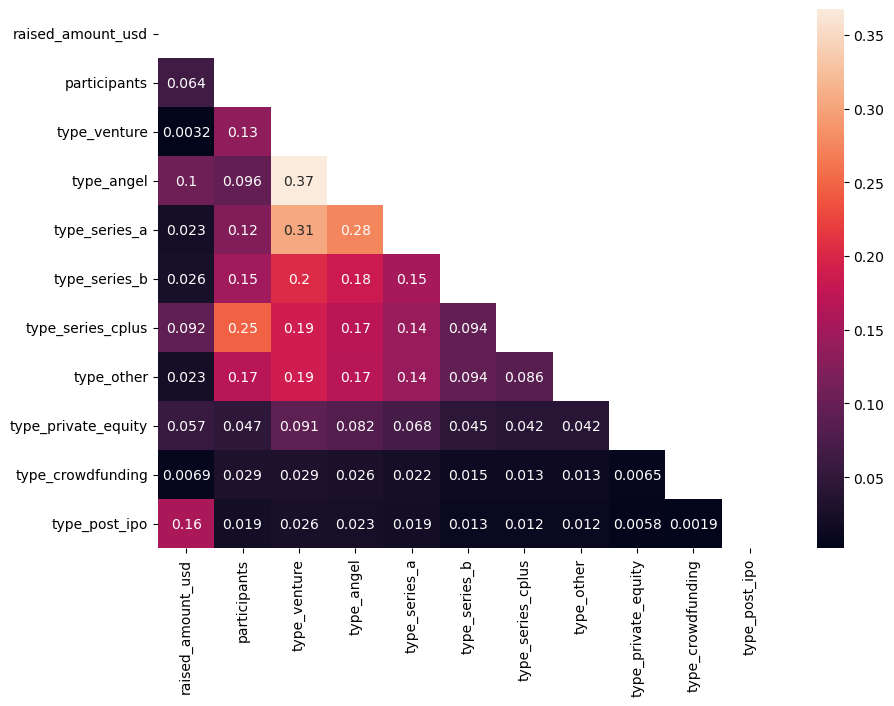

In [35]:
mat = funding_rounds[['raised_amount_usd','participants','type_venture','type_angel','type_series_a','type_series_b','type_series_cplus'
,'type_other','type_private_equity','type_crowdfunding','type_post_ipo']].corr().abs()

mask = np.triu(np.ones_like(mat, dtype=bool))
mat_masked = mat.mask(mask) 

fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(mat_masked, annot=True, ax=ax)
plt.show()

## Data for text and sentiment analysis

In [36]:
text_data = pd.merge(milestones[['object_id','milestone_at', 'milestone_code', 'description']], objects[['id','status', 'category_code']], left_on='object_id', right_on='id', how='left')

In [37]:
milestones

,id,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at
0,1,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,http://www.techcrunch.com/2008/06/10/twitter-f...,"Twitter Fails To Fail, Community Rejoices",2008-06-18 08:14:06,2008-06-18 08:14:06
1,2,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video pla...,http://www.inquisitr.com/1103/seesmic-now-avai...,Seesmic Now Available In Twhirl,2008-06-18 08:46:28,2008-06-18 08:46:28
2,3,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,http://www.comscore.com/press/release.asp?pres...,11 Billion Videos Viewed Online in the U.S. in...,2008-06-18 08:50:24,2008-06-18 08:50:24
3,4,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-ope...,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00
4,5,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-ad...,Reddit Adds Ability to Create Your Own âRedd...,2008-06-19 04:15:53,2008-06-19 04:15:53
...,...,...,...,...,...,...,...,...,...
39451,39452,f:15096,2013-12-12,other,Hyderabad-based tech incubator-cum-seed fund B...,http://techcircle.vccircle.com/2013/12/12/hyde...,Hyderabad-based tech incubator-cum-seed fund B...,2013-12-12 12:32:27,2013-12-12 12:32:27
39452,39453,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision f...,http://www.miicard.com/news/201312/miicard-bui...,miiCard builds on recent momentum and vision f...,2013-12-12 12:58:47,2013-12-12 13:01:22
39453,39454,f:15097,2013-12-12,other,Quadro Capital Partners and FOREX CLUB Founder...,http://www.pehub.com/2013/12/quadro-capital-pa...,Quadro Capital Partners and FOREX CLUB Founder...,2013-12-12 13:12:01,2013-12-12 13:12:01
39454,39455,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln ...,http://www.pehub.com/2013/12/odyssey-investmen...,Odyssey Investment Partners set to hit $2 bln ...,2013-12-12 13:15:36,2013-12-12 13:15:36


In [38]:
objects

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462646,r:9995,Product,9995,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:12,2008-11-28 23:24:22
462647,r:9996,Product,9996,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23
462648,r:9997,Product,9997,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23
462649,r:9998,Product,9998,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23


In [39]:
text_data.dropna(subset=['description', 'status'], how='any', inplace=True)
text_data.drop(columns=['id'], inplace=True)
# Only keep data from USA
text_data = text_data[text_data['object_id'].isin(usa_offices['object_id'])]


In [40]:
text_data

,object_id,milestone_at,milestone_code,description,status,category_code
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,ipo,social
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,ipo,search
3,c:314,2008-06-18,other,Reddit goes Open Source,acquired,web
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,acquired,web
5,c:283,2008-06-18,other,"Adobe announced new content from MTV Networks,...",ipo,software
...,...,...,...,...,...,...
39444,f:15095,2013-12-05,other,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN
39449,c:260812,2013-11-19,other,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN
39452,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision f...,operating,security
39454,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN


### Sentiment analysis

In [41]:
#Function for removing special characters and numericals leaving the alphabets
def clean(text):
    
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [42]:
# Removing html syntax
text_data['clean_decription'] = text_data['description'].str.replace(r'<[^<>]*>', '', regex=True)

# Expanding english contractions
text_data['clean_decription'] = text_data['clean_decription'].apply(lambda x: [contractions.fix(word) for word in x.split()])

# Convert back to string values
text_data['clean_decription']= text_data['clean_decription'].apply(lambda x: ' '.join([item for item in x if len(item)>=2]))

# Remove special charaters and numericals
text_data['clean_decription'] = text_data['clean_decription'].apply(clean)

# Remove one letter words
text_data['clean_decription'] = text_data['clean_decription'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

# Lemmatizing the reviews 
wordnet_lem = WordNetLemmatizer()
text_data['clean_decription'] = text_data['clean_decription'].apply(wordnet_lem.lemmatize)

# Change to lower case letter for wordcloud purposes. 
text_data['clean_decription'] = text_data['clean_decription'].str.lower()

text_data

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_1544/2347548496.py:14: FutureWarning:

The default value of regex will change from True to False in a future version.



,object_id,milestone_at,milestone_code,description,status,category_code,clean_decription
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,ipo,social,survives iphone stevenote
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,ipo,search,more than billion videos viewed at google site...
3,c:314,2008-06-18,other,Reddit goes Open Source,acquired,web,reddit goes open source
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,acquired,web,adds the ability to create your own reddits
5,c:283,2008-06-18,other,"Adobe announced new content from MTV Networks,...",ipo,software,adobe announced new content from mtv networks ...
...,...,...,...,...,...,...,...
39444,f:15095,2013-12-05,other,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN,capitalworks brings avtron aerospace into its ...
39449,c:260812,2013-11-19,other,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN,manyship is showcased at the berkeley entrepre...
39452,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision f...,operating,security,miicard builds on recent momentum and vision f...
39454,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN,odyssey investment partners set to hit bln har...


In [43]:
# Filtering rows where status is "operating"
opr_text_data = text_data[text_data['status'] == 'operating']

# Concatenating values in the "clean_decription" column for closed rows into a single string
opr_text = ' '.join(opr_text_data['clean_decription'].tolist())
opr_text = [opr_text]

In [44]:
# Filtering rows where status is "closed"
closed_text_data = text_data[text_data['status'] == 'closed']

# Concatenating values in the "clean_decription" column for closed rows into a single string
closed_text = ' '.join(closed_text_data['clean_decription'].tolist())
closed_text = [closed_text]
closed_text

['flycast covers terrestrial stations with over channels podcasts to choose from users can also use the shoutcast powered engine to search for an additional stations at the same cost free  mytoons com announces high definition animation contest mytoons com launches hd redesign mytoons com delivers animations to viewers on new adobe media player mytoons com launches user generated animation site smalltown management team grows as service expands nationally company claims users flytunes announces partnership with broadcasting company entercom sampa nears th customer adds marketing vp lexy signs unique deal with the onion to be its mobile distribution partner for all audio content cuil launches publicly cuil crashes immediately after launch owing it apparently to overwhelming demand  event innovation names jay fluegel formerly of microsoft vice president of product management minggl launches political wall facebook application  closed down flipmail which made it possible to have mail on y

In [45]:
# Function for creating wordclouds
def wordcloud(text,color):

    # Creating the TF-IDF scores 
    tf_idf_vect = TfidfVectorizer(stop_words ='english')
    X_train_tf_idf = tf_idf_vect.fit_transform(text)
    terms = tf_idf_vect.get_feature_names_out()
    dense = X_train_tf_idf.todense()
    dlist = dense.tolist()
    tf_df = pd.DataFrame(dlist,columns=terms)

    #tf_df = tf_df.drop(columns=stopword)


    #Creating the vectors
    df_vector = tf_df.T.sum(axis=1)
    
    # create a mask based on the star image
    #my_mask = np.array(Image.open('star.jpg'))
    # create a wordcloud 
    wc = WordCloud(background_color='black', max_words = 50,
               #mask=my_mask,
               collocations=False,
               width=600,
               height=300,colormap=color,   
               contour_width=3,
               contour_color='black')
    
 

    #Plotting the wordclouds
    Cloud = wc.generate_from_frequencies(df_vector)
    
    return Cloud 

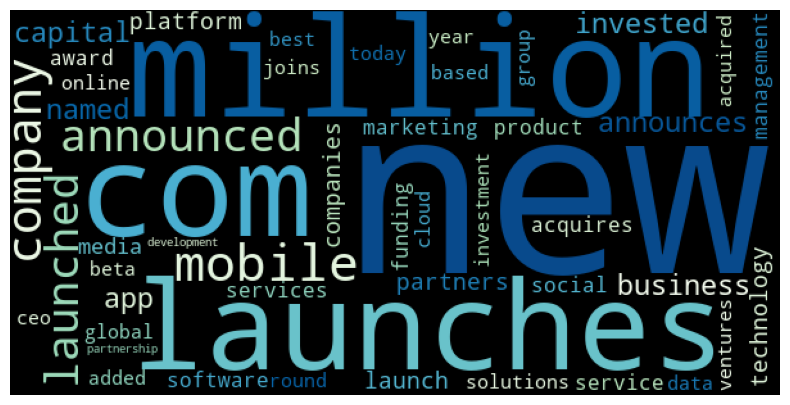

In [46]:
# Plotting wordcloud
full_wordcloud = wordcloud(opr_text,'GnBu_r')
plt.figure(figsize=(10, 5))
plt.imshow(full_wordcloud)
#plt.title("Reviews")
plt.axis("off")
plt.show()

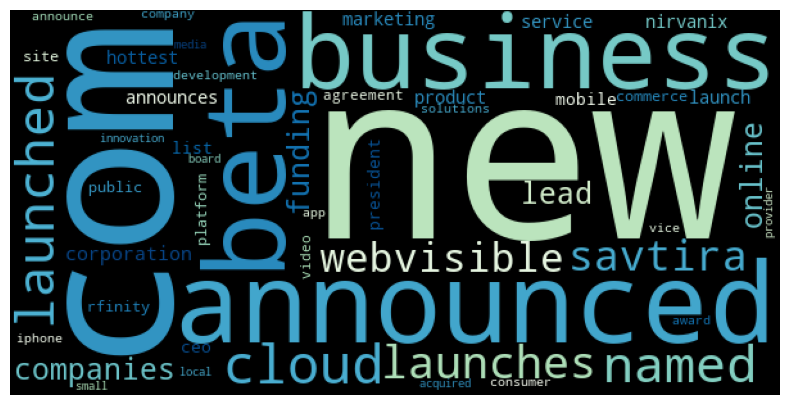

In [47]:
# Plotting wordcloud
full_wordcloud = wordcloud(closed_text,'GnBu')
plt.figure(figsize=(10, 5))
plt.imshow(full_wordcloud)
#plt.title("Reviews")
plt.axis("off")
plt.show()

In [48]:
# Creating sentiment scores 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
text_data['polarity'] = text_data['clean_decription'].apply(lambda review: sid.polarity_scores(review))

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
text_data

,object_id,milestone_at,milestone_code,description,status,category_code,clean_decription,polarity
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,ipo,social,survives iphone stevenote,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,ipo,search,more than billion videos viewed at google site...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,c:314,2008-06-18,other,Reddit goes Open Source,acquired,web,reddit goes open source,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,acquired,web,adds the ability to create your own reddits,"{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'comp..."
5,c:283,2008-06-18,other,"Adobe announced new content from MTV Networks,...",ipo,software,adobe announced new content from mtv networks ...,"{'neg': 0.0, 'neu': 0.937, 'pos': 0.063, 'comp..."
...,...,...,...,...,...,...,...,...
39444,f:15095,2013-12-05,other,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN,capitalworks brings avtron aerospace into its ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
39449,c:260812,2013-11-19,other,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN,manyship is showcased at the berkeley entrepre...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
39452,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision f...,operating,security,miicard builds on recent momentum and vision f...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp..."
39454,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN,odyssey investment partners set to hit bln har...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp..."


In [ ]:
# Creating a new dataframe where the sentiment score is added "neg", "neu", "pos" og "compound"
sentiment_df = pd.concat(
    [text_data.drop(['milestone_at', 'milestone_code', 'polarity'], axis=1), 
     text_data['polarity'].apply(pd.Series)], axis=1)
sentiment_df

,object_id,description,status,category_code,clean_decription,neg,neu,pos,compound
0,c:12,Survives iPhone 3G Stevenote,ipo,social,survives iphone stevenote,0.000,1.000,0.000,0.0000
2,c:59,More than 4 Billion videos viewed at Google Si...,ipo,search,more than billion videos viewed at google site...,0.000,1.000,0.000,0.0000
3,c:314,Reddit goes Open Source,acquired,web,reddit goes open source,0.000,1.000,0.000,0.0000
4,c:314,Adds the ability to create your own Reddits,acquired,web,adds the ability to create your own reddits,0.000,0.577,0.423,0.5267
5,c:283,"Adobe announced new content from MTV Networks,...",ipo,software,adobe announced new content from mtv networks ...,0.000,0.937,0.063,0.3612
...,...,...,...,...,...,...,...,...,...
39444,f:15095,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN,capitalworks brings avtron aerospace into its ...,0.000,1.000,0.000,0.0000
39449,c:260812,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN,manyship is showcased at the berkeley entrepre...,0.000,0.787,0.213,0.6908
39452,c:59519,miiCard builds on recent momentum and vision f...,operating,security,miicard builds on recent momentum and vision f...,0.000,0.882,0.118,0.2500
39454,f:4101,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN,odyssey investment partners set to hit bln har...,0.113,0.887,0.000,-0.1027


In [ ]:
# Creating a column classifying the sentiment reviews as positive, neutral or negative. 
sentiment_df['sentiment'] = sentiment_df['compound'].apply(lambda x: 'Positive' if x >0 else 'Neutral' if x==0 else 'Negative')

In [ ]:
# Sentiment distribution 
sentiment_df['sentiment'].value_counts()

Neutral     11537
Positive     7815
Negative      690
Name: sentiment, dtype: int64

# Analysis

## Heatmap

### Data to be used in the map

For this purpose, empty rows must be removed as well as rows with errors in longitude and latitude

In [ ]:
map_data=usa_offices
map_data= map_data[~(map_data['latitude'] == 0.0)]
map_data= map_data[~(map_data['longitude'] == 0.0)]

# remove latitude and logitude outside USA
us_bounds = {
    'lat_min': 24.5,
    'lat_max': 49.5,
    'lon_min': -124.5,
    'lon_max': -66.5
}
out_of_bounds = ~((map_data['latitude'] >= us_bounds['lat_min']) & (map_data['latitude'] <= us_bounds['lat_max']) &
                  (map_data['longitude'] >= us_bounds['lon_min']) & (map_data['longitude'] <= us_bounds['lon_max']))
out_of_bounds_indices = map_data.index[out_of_bounds].tolist()

# Drop the rows outside the USA bounds from the DataFrame
map_data = map_data.drop(index=out_of_bounds_indices)
map_data = pd.merge(map_data, main_data[['id_x','founded_at', 'funding_total_usd', 'name']], left_on='object_id', right_on='id_x', how='left')

map_data= map_data[~(map_data['funding_total_usd'] == 0.0)]

map_data.dropna(subset=['funding_total_usd'], inplace=True)

map_data

,id,object_id,office_id,region,city,state_code,latitude,longitude,id_x,founded_at,funding_total_usd,name
0,1,c:1,1,Seattle,Seattle,WA,47.603122,-122.333253,c:1,2005-10-17,3.975000e+07,Wetpaint
2,3,c:4,4,SF Bay,San Francisco,CA,37.764726,-122.394523,c:4,2004-10-11,4.500000e+07,Digg
3,4,c:5,5,SF Bay,Menlo Park,CA,37.416050,-122.151801,c:5,2004-02-01,2.425700e+09,Facebook
5,7,c:9,9,Los Angeles,West Hollywood,CA,34.090368,-118.393064,c:9,2006-06-01,1.650000e+07,Geni
8,10,c:12,12,SF Bay,San Francisco,CA,37.776805,-122.416924,c:12,2006-03-21,1.160167e+09,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
20188,101491,c:262931,115973,San Diego,San Diego,CA,32.907899,-117.187637,c:262931,NaN,1.680000e+06,Trex Enterprises
20189,101493,c:233352,115975,SF Bay,San Francisco,CA,37.773570,-122.415787,c:233352,2011-01-01,2.000000e+05,Attendify
20212,101555,c:263050,116042,Atlanta,Atlanta,GA,33.863183,-84.478702,c:263050,2012-02-05,1.350000e+05,Stroho
20214,101609,c:263285,116098,Minneapolis,Eden Prairie,MN,44.864036,-93.455321,c:263285,NaN,1.650000e+07,Recovery Technology Solutions


In [ ]:
# create a map centered on the first location in the data frame
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# create a list of points for the heatmap, with the weight based on the price
heat_data = [[row['latitude'], row['longitude'], row['funding_total_usd']] for index, row in map_data.iterrows()]

# create a heatmap layer with the data and the specified gradient color
gradient = {0.2: '#005c6e', 0.4: '#21918c', 0.6: '#4cc0a4', 0.8: '#8ad3ba', 1: '#c3ebdf'}

HeatMap(heat_data, min_opacity=0.2, radius=35, blur=0.5, max_zoom=2, gradient=gradient).add_to(m)

# set bounds of the map to cover the entire USA
m.fit_bounds([[24.527135, -127.792969], [49.61071, -59.765625]])
# display the map
m
#m.save('heatmap.html')
